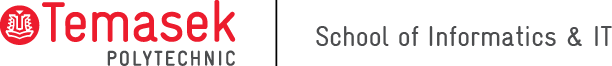
### <center>  Data Science Essentials (CAA1C05)</center>
### <center>  Individual Project</center>

### <font color=red>Fill in your personal data below

#### <font color=blue>Name: Muhamad Shazwandi <font color=black>
#### <font color=blue>Admin No: 2181263A<font color=black>
#### <font color=blue>Class: <font color=black> 

### <font color=red> Declaration of Originality

#### I declare that I am the originator of this work and that all other original sources used in this work have been appropriately acknowledged.

#### I understand that plagiarism is the act of taking and using the whole or any part of another person’s work and presenting it as my own without proper acknowledgement.

#### I understand that allowing someone else to copy my work and submit it as their own is also considered as plagiarism.

#### I also understand that plagiarism is an academic offence and that disciplinary action will be taken for plagiarism.”

#### Please sign your name or insert a picture of your signature in the markdown cell below. (double click on the cell)


#### 1. This project deliverable is worth 60% of the final marks for DSES. The total mark is 100. There are two submissions required- Part I and Part II The due dates are  <font color=red>16 Jan and 16 Feb 2022, 11:59 pm. 
#### 2. For Part I submission, you need to complete Data Understanding and Data Preparation.
#### 3. For Part II submission, you need to complete Data Modelling, Recommendations & Conclusion.
#### 4. Note that you should still keep your codes for Part I for tutor to evaluate Part II. 
#### 5. This is an individual deliverable. You are required to produce your own work.
#### 6. You are allowed to use packages (libraries) not covered in the lecture slides or practicals (e.g. scikit-learn, seaborn, etc.)
#### 7. Apart from using Markdown cells to include your description, take-aways, and comments, provide sufficient comments to your codes too. 
#### 8. Name your notebook according to the following format. 
>e.g. YourName_2100001A_Assignment
#### 9. You need to submit your deliverable, i.e. this Jupyter Notebook in two different formats (ipynb and html).
>1. html format is for plagiarism check
>2. ipynb format is for marking

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

!pip install imblearn
pd.set_option('display.max_columns', None)

In [2]:
file = r"C:\Users\User\Desktop\SEM 2\DSE\Assignment\ProjectDataSet.csv"
full_df = pd.read_csv(file, delimiter = ",")

full_df.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied


# <font color= maroon> Project Background & Aims 

The ongoing pandemic has brought the flight traffics of many countries to a standstill. However, it is this respite that airlines can reflect, based on past feedback obtained from their passengers, what are the factors that contribute to customer satisfaction. This is the case for Airline X. They collected data from their past passengers and would like to find out if good service was provided in terms of ease of online booking, seat comfort, check-in experience, cleanliness, baggage handling, etc., and the overall satisfaction level. Finding out the areas where they fell short of and harnessing their existing strengths, Airline X hopes to serve their customers to the best in time to come and be the choice airline. 

Airline X wants to understand how the profiles of the passengers and their ratings of different services could possibly affect the overall satisfaction level. The airline also wishes to identify their strengths and areas of focus. 

You are part of the Data Science team to assist Airline X. Follow the steps of the Data Science Life Cycle to build predictive models to help increase the customer satisfaction level

# <font color= maroon>  Data Preparation 

- Enter your general description here.
- You can shift this section before Data Understanding if you wish to perform EDA on cleaned and transformed data.

## <font color= grey> Data Cleaning

Provide the description, justification and results of your technique(s) here.

# Duplicate Values

In [3]:
# To check for duplicate values
full_df.duplicated().sum()

1

In [4]:
# To see what is the duplicate
full_df_duplicate = full_df[full_df.duplicated()]
full_df_duplicate

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
42177,42176,72507,Male,Loyal Customer,27.0,Business travel,Business,3247,5,5.0,5.0,5.0,4,4,4,4,5,2,5,5,5,4,0.0,0.0,satisfied


In [5]:
# To remove duplicate values and to check if the duplicate values are dropped
full_df = full_df.drop_duplicates()
full_df.duplicated().sum()

0

# Missing Values

In [6]:
#To check if there is any missing data.
full_df.isnull().sum()

sn                                      0
id                                      0
Gender                                  0
Customer Type                           0
Age                                     5
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       2
Ease of Online booking                  2
Gate location                        2191
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes          

For values that are low we can look into replacing it with a more sensible values. However, columns like Gate Location with over 2000 missing values its not physible to replace the missing values as it will tamper with the integrity of the dataset. Hence I would want to put the missing values for Gate Location as a separate Bin when analysing it.

Even for values for satisfaction it wouldnt be justifiable to change the values of it, hence I would just pack them into a seperate bin.

In [7]:
#To show the row with missing values for Ease of Online booking
full_df[full_df['Ease of Online booking'].isna()]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
61088,61087,112347,Female,Loyal Customer,40.0,Business travel,Business,853,1,1.0,NaN,1.0,2,5,4,5,5,5,5,3,5,3,31.0,17.0,satisfied
103825,103824,127405,Male,Loyal Customer,19.0,Business travel,Business,1639,1,1.0,NaN,1.0,5,5,5,5,4,5,5,4,1,5,0.0,0.0,satisfied


I would then replace the value to 0 assuming that they are very disatisfied with the service named in the column

In [8]:
#To replace value for Ease of Online booking with 0
full_df['Ease of Online booking'].fillna(0, inplace = True)
full_df

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,103899,94171,Female,disloyal Customer,23.0,Business travel,Eco,192,2,1.0,2.0,3.0,2,2,2,2,3,1,4,2,3,2,3.0,0.0,neutral or dissatisfied
103901,103900,73097,Male,Loyal Customer,49.0,Business travel,Business,2347,4,4.0,4.0,4.0,2,4,5,5,5,5,5,5,5,4,0.0,0.0,satisfied
103902,103901,68825,Male,disloyal Customer,30.0,Business travel,Business,1995,1,1.0,1.0,3.0,4,1,5,4,3,2,4,5,5,4,7.0,14.0,NaN
103903,103902,54173,Female,disloyal Customer,22.0,Business travel,Eco,1000,1,1.0,1.0,5.0,1,1,1,1,4,5,1,5,4,1,0.0,0.0,neutral or dissatisfied


In [9]:
#To check if the missing data is replaced properly
full_df.loc[[61088, 103825]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
61088,61087,112347,Female,Loyal Customer,40.0,Business travel,Business,853,1,1.0,0.0,1.0,2,5,4,5,5,5,5,3,5,3,31.0,17.0,satisfied
103825,103824,127405,Male,Loyal Customer,19.0,Business travel,Business,1639,1,1.0,0.0,1.0,5,5,5,5,4,5,5,4,1,5,0.0,0.0,satisfied


In [10]:
#To show the row with missing values for Departure/Arrival time convenient
full_df[full_df['Departure/Arrival time convenient'].isna()]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71608,71607,92310,Female,Loyal Customer,39.0,Business travel,Business,2486,1,NaN,1.0,1.0,3,3,3,3,3,4,4,3,4,3,0.0,40.0,satisfied
71735,71734,70403,Male,Loyal Customer,70.0,Personal Travel,Eco,1562,1,NaN,1.0,3.0,3,1,3,3,1,2,2,4,4,3,0.0,0.0,neutral or dissatisfied


In [11]:
#To replace value for Departure/Arrival time convenient with 0
full_df['Departure/Arrival time convenient'].fillna(0, inplace = True)
full_df

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,103899,94171,Female,disloyal Customer,23.0,Business travel,Eco,192,2,1.0,2.0,3.0,2,2,2,2,3,1,4,2,3,2,3.0,0.0,neutral or dissatisfied
103901,103900,73097,Male,Loyal Customer,49.0,Business travel,Business,2347,4,4.0,4.0,4.0,2,4,5,5,5,5,5,5,5,4,0.0,0.0,satisfied
103902,103901,68825,Male,disloyal Customer,30.0,Business travel,Business,1995,1,1.0,1.0,3.0,4,1,5,4,3,2,4,5,5,4,7.0,14.0,NaN
103903,103902,54173,Female,disloyal Customer,22.0,Business travel,Eco,1000,1,1.0,1.0,5.0,1,1,1,1,4,5,1,5,4,1,0.0,0.0,neutral or dissatisfied


In [12]:
#To check if the missing data is replaced properly
full_df.loc[[71608, 71735]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71608,71607,92310,Female,Loyal Customer,39.0,Business travel,Business,2486,1,0.0,1.0,1.0,3,3,3,3,3,4,4,3,4,3,0.0,40.0,satisfied
71735,71734,70403,Male,Loyal Customer,70.0,Personal Travel,Eco,1562,1,0.0,1.0,3.0,3,1,3,3,1,2,2,4,4,3,0.0,0.0,neutral or dissatisfied


In [13]:
#To show the row with missing values for Age
df_null_age = full_df[full_df['Age'].isna()]
df_null_age

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
40721,40721,106862,Female,Loyal Customer,NaN,Business travel,Business,3772,2,2.0,2.0,2.0,4,5,5,4,4,4,4,4,4,5,0.0,0.0,satisfied
48358,48357,128157,Male,Loyal Customer,NaN,Business travel,Business,1788,1,1.0,1.0,1.0,5,5,4,5,5,5,5,3,5,5,0.0,0.0,satisfied
48380,48379,7070,Male,disloyal Customer,NaN,Business travel,Business,157,2,2.0,2.0,3.0,2,2,2,2,4,4,4,4,4,2,4.0,15.0,neutral or dissatisfied
64632,64631,31875,Female,Loyal Customer,NaN,Business travel,Business,4983,3,5.0,5.0,5.0,3,3,3,3,3,3,5,3,2,3,16.0,0.0,satisfied
93451,93450,51253,Female,disloyal Customer,NaN,Business travel,Eco Plus,110,2,0.0,2.0,2.0,5,2,4,5,3,3,5,4,1,5,0.0,0.0,neutral or dissatisfied


These 5 rows shows that rows with null values for Age still has important values from other columns, hence I would not want to just delete the rows. I would want to replace the NaN values with the mean Age of the whole Dataset.

In [14]:
#finding mean age of the dataset
df_age_mean = round(full_df['Age'].mean())
df_age_mean

39

In [15]:
#To replace missing Age with the mean age of the dataset
full_df['Age'].fillna(df_age_mean, inplace = True)
full_df

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,103899,94171,Female,disloyal Customer,23.0,Business travel,Eco,192,2,1.0,2.0,3.0,2,2,2,2,3,1,4,2,3,2,3.0,0.0,neutral or dissatisfied
103901,103900,73097,Male,Loyal Customer,49.0,Business travel,Business,2347,4,4.0,4.0,4.0,2,4,5,5,5,5,5,5,5,4,0.0,0.0,satisfied
103902,103901,68825,Male,disloyal Customer,30.0,Business travel,Business,1995,1,1.0,1.0,3.0,4,1,5,4,3,2,4,5,5,4,7.0,14.0,NaN
103903,103902,54173,Female,disloyal Customer,22.0,Business travel,Eco,1000,1,1.0,1.0,5.0,1,1,1,1,4,5,1,5,4,1,0.0,0.0,neutral or dissatisfied


In [16]:
#To check if values are replaced
full_df.loc[[40721, 48358, 48380, 64632, 93451]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
40721,40721,106862,Female,Loyal Customer,39.0,Business travel,Business,3772,2,2.0,2.0,2.0,4,5,5,4,4,4,4,4,4,5,0.0,0.0,satisfied
48358,48357,128157,Male,Loyal Customer,39.0,Business travel,Business,1788,1,1.0,1.0,1.0,5,5,4,5,5,5,5,3,5,5,0.0,0.0,satisfied
48380,48379,7070,Male,disloyal Customer,39.0,Business travel,Business,157,2,2.0,2.0,3.0,2,2,2,2,4,4,4,4,4,2,4.0,15.0,neutral or dissatisfied
64632,64631,31875,Female,Loyal Customer,39.0,Business travel,Business,4983,3,5.0,5.0,5.0,3,3,3,3,3,3,5,3,2,3,16.0,0.0,satisfied
93451,93450,51253,Female,disloyal Customer,39.0,Business travel,Eco Plus,110,2,0.0,2.0,2.0,5,2,4,5,3,3,5,4,1,5,0.0,0.0,neutral or dissatisfied


In [17]:
#To see missing values for Arrival Delay in Minutes
df_null_arrival = full_df[full_df['Arrival Delay in Minutes'].isna()]
df_null_arrival

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38.0,Business travel,Eco,109,5,3.0,3.0,3.0,5,5,5,5,5,2,4,1,1,5,31.0,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53.0,Personal Travel,Eco,1012,3,2.0,3.0,4.0,4,3,4,4,4,4,4,3,3,4,38.0,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39.0,Business travel,Business,733,2,5.0,5.0,5.0,2,4,3,2,2,2,2,2,2,3,11.0,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26.0,Business travel,Business,1035,3,3.0,3.0,1.0,2,3,2,2,3,3,4,5,5,2,41.0,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24.0,Personal Travel,Eco,417,2,1.0,2.0,2.0,5,2,5,5,1,4,2,1,2,5,1.0,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102068,102067,36729,Male,Loyal Customer,49.0,Personal Travel,Eco Plus,1249,2,5.0,2.0,3.0,2,3,3,3,4,5,4,3,4,3,230.0,NaN,neutral or dissatisfied
102385,102384,71241,Male,Loyal Customer,58.0,Business travel,Eco,733,3,3.0,3.0,3.0,3,3,3,3,3,1,2,4,2,3,55.0,NaN,neutral or dissatisfied
102553,102552,27684,Female,disloyal Customer,29.0,Business travel,Eco,1107,2,1.0,1.0,1.0,5,1,3,5,4,1,5,5,3,5,0.0,NaN,neutral or dissatisfied
102961,102960,36787,Male,Loyal Customer,58.0,Business travel,Eco,1088,4,4.0,1.0,1.0,5,4,5,5,1,5,5,5,3,5,0.0,NaN,satisfied


In [18]:
#finding mode Arrival Delay of the dataset
df_arrival_mode = round(full_df['Arrival Delay in Minutes'].mode())
df_arrival_mode

0    0.0
dtype: float64

In [19]:
#To replace missing Arrival Delay with the mode delay of the dataset
full_df['Arrival Delay in Minutes'].fillna(0, inplace = True)
full_df

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,103899,94171,Female,disloyal Customer,23.0,Business travel,Eco,192,2,1.0,2.0,3.0,2,2,2,2,3,1,4,2,3,2,3.0,0.0,neutral or dissatisfied
103901,103900,73097,Male,Loyal Customer,49.0,Business travel,Business,2347,4,4.0,4.0,4.0,2,4,5,5,5,5,5,5,5,4,0.0,0.0,satisfied
103902,103901,68825,Male,disloyal Customer,30.0,Business travel,Business,1995,1,1.0,1.0,3.0,4,1,5,4,3,2,4,5,5,4,7.0,14.0,NaN
103903,103902,54173,Female,disloyal Customer,22.0,Business travel,Eco,1000,1,1.0,1.0,5.0,1,1,1,1,4,5,1,5,4,1,0.0,0.0,neutral or dissatisfied


In [20]:
#To see the missing data is corrected
full_df.isnull().sum()

sn                                      0
id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                        2191
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes          

# Outliers

<AxesSubplot:>

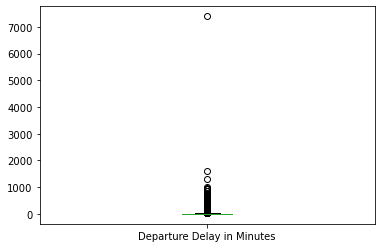

In [21]:
#To find outliers in the Departure Delay in Minutes column
full_df['Departure Delay in Minutes'].plot(kind='box')

In [22]:
#To single out the row with values of Depature more than 7000 (outlier)
full_df[full_df['Departure Delay in Minutes']> 7000]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
91364,91363,83560,Male,Loyal Customer,21.0,Personal Travel,Eco Plus,1865,4,2.0,4.0,2.0,2,4,2,2,1,4,3,4,3,2,7400.0,80.0,neutral or dissatisfied


Assuming that the high value was just the customer exaggerating the time he needed to wait, I would replace the value with the 75th percentile of the dataset.

In [23]:
#finding the 75th percentile of the Depature Delay
percentile_departure_delay = np.percentile(full_df['Departure Delay in Minutes'], 75)
print(percentile_departure_delay)

12.0


In [24]:
#replacing the values
full_df['Departure Delay in Minutes'] = full_df['Departure Delay in Minutes'].replace([7400], percentile_departure_delay)
full_df.loc[[91364]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
91364,91363,83560,Male,Loyal Customer,21.0,Personal Travel,Eco Plus,1865,4,2.0,4.0,2.0,2,4,2,2,1,4,3,4,3,2,12.0,80.0,neutral or dissatisfied


<AxesSubplot:>

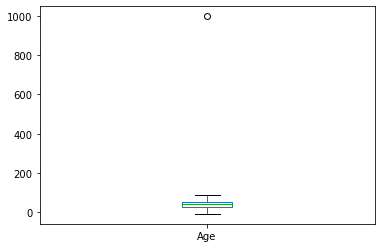

In [25]:
#To see if any outliers in column Age
full_df['Age'].plot(kind='box')

In [26]:
#To single out the row with values of Age more than 800 (outlier)
full_df[full_df['Age']> 800]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
4074,4074,44693,Male,Loyal Customer,999.0,Business travel,Business,67,5,5.0,5.0,5.0,2,2,5,4,4,4,5,2,4,1,55.0,48.0,satisfied


In [27]:
#To replace the age of the outlier with the mean age of the dataset
full_df['Age'] = full_df['Age'].replace([999], df_age_mean)
full_df.loc[[4074]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
4074,4074,44693,Male,Loyal Customer,39.0,Business travel,Business,67,5,5.0,5.0,5.0,2,2,5,4,4,4,5,2,4,1,55.0,48.0,satisfied


<AxesSubplot:>

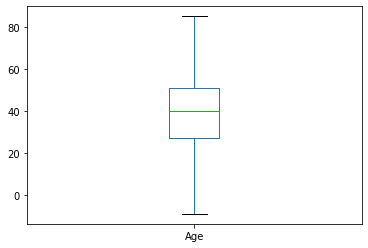

In [28]:
#To check if the boxplot shows the data better now
full_df['Age'].plot(kind='box')

As you can see from the box plot of the Age column the whiskers extend past zero, which doesnt make sense, suggesting more Data Error

In [29]:
#To check for other outliers below Age 0
full_df[full_df['Age']<= 0]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
63357,63356,76560,Male,Loyal Customer,-9.0,Business travel,Business,2153,2,1.0,1.0,1.0,2,3,2,2,4,2,4,3,4,2,0.0,0.0,neutral or dissatisfied
68553,68552,51183,Female,Loyal Customer,-1.0,Business travel,Eco Plus,266,4,5.0,5.0,5.0,4,4,4,4,3,1,2,2,4,4,105.0,94.0,satisfied


In [30]:
#replacing the age below 0 to the mean age of the dataset
full_df['Age'] = full_df['Age'].replace([-9, -1], df_age_mean)
full_df.loc[[63357, 68553]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
63357,63356,76560,Male,Loyal Customer,39.0,Business travel,Business,2153,2,1.0,1.0,1.0,2,3,2,2,4,2,4,3,4,2,0.0,0.0,neutral or dissatisfied
68553,68552,51183,Female,Loyal Customer,39.0,Business travel,Eco Plus,266,4,5.0,5.0,5.0,4,4,4,4,3,1,2,2,4,4,105.0,94.0,satisfied


Using mean as a method of replacing as with a big dataset I wanted to fill in the incorrect values with the middle of the value for age

<AxesSubplot:>

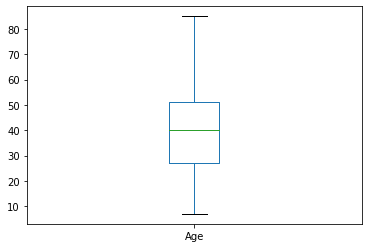

In [31]:
#To check if the boxplot shows the data better now
full_df['Age'].plot(kind='box')

<AxesSubplot:>

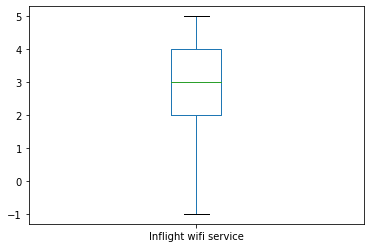

In [32]:
#To find any outliers in the Inflight wifi service
full_df['Inflight wifi service'].plot(kind='box')

 From the box plot you can see that there are data errors as the input should be from 0 - 5 but there is data with entries -1

In [33]:
#To single out the entries with data errors
full_df[full_df['Inflight wifi service']< 0]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
398,398,17284,Male,Loyal Customer,32.0,Business travel,Business,3607,-1,1.0,1.0,1.0,5,5,5,5,4,2,5,1,5,5,0.0,0.0,satisfied
627,627,78234,Male,Loyal Customer,53.0,Business travel,Business,1741,-1,1.0,1.0,1.0,4,5,5,4,4,4,4,3,4,3,0.0,0.0,satisfied
628,628,23979,Male,Loyal Customer,52.0,Business travel,Business,3092,-1,1.0,1.0,1.0,2,4,5,4,4,4,4,5,4,3,7.0,16.0,satisfied


In [34]:
#To find mode of Inflight wifi service
df_wifi_mode = round(full_df['Inflight wifi service'].mode())
df_wifi_mode

0    3
dtype: int64

Replacing the values with mode as to have the values be replaced as majority of the values in th dataset

In [35]:
#To replace the Inflight wifi service of the outlier with the mode wifi of the dataset
full_df['Inflight wifi service'] = full_df['Inflight wifi service'].replace([-1], df_wifi_mode)
full_df.loc[[398, 627, 628]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
398,398,17284,Male,Loyal Customer,32.0,Business travel,Business,3607,3,1.0,1.0,1.0,5,5,5,5,4,2,5,1,5,5,0.0,0.0,satisfied
627,627,78234,Male,Loyal Customer,53.0,Business travel,Business,1741,3,1.0,1.0,1.0,4,5,5,4,4,4,4,3,4,3,0.0,0.0,satisfied
628,628,23979,Male,Loyal Customer,52.0,Business travel,Business,3092,3,1.0,1.0,1.0,2,4,5,4,4,4,4,5,4,3,7.0,16.0,satisfied


In [36]:
#To find any outliers in the Baggage location
full_df['Baggage handling'].unique()

array(['4', '3', '5', '1', '2', '-', 5, 3, 4, 2, 1], dtype=object)

In [37]:
#To find the rows with Baggage handling values '-'
full_df.loc[full_df['Baggage handling'] == '-']

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90,90,76392,Male,Loyal Customer,60.0,Personal Travel,Eco,931,0,5.0,0.0,3.0,4,0,3,4,4,5,-,4,5,4,0.0,0.0,satisfied
347,347,83191,Female,Loyal Customer,45.0,Business travel,Business,1123,5,5.0,5.0,5.0,2,5,4,5,5,5,-,5,5,3,0.0,5.0,satisfied
540,540,94026,Male,disloyal Customer,37.0,Business travel,Business,148,4,4.0,4.0,2.0,4,4,3,4,3,4,-,4,5,4,1.0,0.0,satisfied
686,686,96804,Male,disloyal Customer,23.0,Business travel,Business,1041,4,4.0,4.0,1.0,2,4,2,2,4,5,-,4,5,2,15.0,1.0,satisfied
890,890,1489,Female,Loyal Customer,54.0,Business travel,Business,737,4,4.0,4.0,4.0,3,5,4,5,5,5,-,5,5,3,0.0,3.0,satisfied
1122,1122,70108,Female,disloyal Customer,42.0,Business travel,Business,460,3,3.0,3.0,2.0,5,3,5,5,3,3,-,4,5,5,0.0,0.0,neutral or dissatisfied


In [38]:
#Replacing Baggage handling '-' values to 0
full_df['Baggage handling'] = full_df['Baggage handling'].replace(['-'],0)
full_df.loc[[90, 347, 540, 686, 890, 1122]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90,90,76392,Male,Loyal Customer,60.0,Personal Travel,Eco,931,0,5.0,0.0,3.0,4,0,3,4,4,5,0,4,5,4,0.0,0.0,satisfied
347,347,83191,Female,Loyal Customer,45.0,Business travel,Business,1123,5,5.0,5.0,5.0,2,5,4,5,5,5,0,5,5,3,0.0,5.0,satisfied
540,540,94026,Male,disloyal Customer,37.0,Business travel,Business,148,4,4.0,4.0,2.0,4,4,3,4,3,4,0,4,5,4,1.0,0.0,satisfied
686,686,96804,Male,disloyal Customer,23.0,Business travel,Business,1041,4,4.0,4.0,1.0,2,4,2,2,4,5,0,4,5,2,15.0,1.0,satisfied
890,890,1489,Female,Loyal Customer,54.0,Business travel,Business,737,4,4.0,4.0,4.0,3,5,4,5,5,5,0,5,5,3,0.0,3.0,satisfied
1122,1122,70108,Female,disloyal Customer,42.0,Business travel,Business,460,3,3.0,3.0,2.0,5,3,5,5,3,3,0,4,5,5,0.0,0.0,neutral or dissatisfied


In [39]:
full_df['Baggage handling'] = full_df['Baggage handling'].replace('0', 0)
full_df['Baggage handling'] = full_df['Baggage handling'].replace('1', 1)
full_df['Baggage handling'] = full_df['Baggage handling'].replace('2', 2)
full_df['Baggage handling'] = full_df['Baggage handling'].replace('3', 3)
full_df['Baggage handling'] = full_df['Baggage handling'].replace('4', 4)
full_df['Baggage handling'] = full_df['Baggage handling'].replace('5', 5)

In [40]:
# To single out entries with the outliers
full_df[full_df['Ease of Online booking']> 900]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
53675,53674,4696,Female,Loyal Customer,38.0,Personal Travel,Eco,364,1,5.0,999.0,2.0,2,1,2,2,5,3,4,4,5,2,0.0,12.0,neutral or dissatisfied
103880,103879,59339,Female,Loyal Customer,30.0,Business travel,Business,2338,1,1.0,999.0,1.0,4,4,4,4,3,4,4,5,5,4,2.0,0.0,satisfied


In [41]:
#replacing the Suvey value to the highest value assuming that they wanted to give a high score 
full_df['Ease of Online booking'] = full_df['Ease of Online booking'].replace([999.0, 999.0], 5)
full_df.loc[[53675, 103880]]

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
53675,53674,4696,Female,Loyal Customer,38.0,Personal Travel,Eco,364,1,5.0,5.0,2.0,2,1,2,2,5,3,4,4,5,2,0.0,12.0,neutral or dissatisfied
103880,103879,59339,Female,Loyal Customer,30.0,Business travel,Business,2338,1,1.0,5.0,1.0,4,4,4,4,3,4,4,5,5,4,2.0,0.0,satisfied


Replacing the value with the highest score assuming the customers was just exaggerating the score wanted to be given to that patircular attribute.

Feel free to insert more cells to continue reporting on your Data Cleaning.

## <font color= grey> Data Transformation

### Transformation 1

I would like to change the values in Customer Type to standardise the attributes. I would be encoding the following values in the 'Customer Type' column: \
'loyal' : 0 \
'disloyal' : 1

In [42]:
#To find the different unique attributes for column 'Customer Type'
full_df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer', 'loyal', 'Disloyal',
       'DISLOYAL CUSTOMER', 'Disloyal Customer'], dtype=object)

In [43]:
#To standardise the inputs to just 'loyal' & 'disloyal'

#To loyal
full_df['Customer Type'] = full_df['Customer Type'].replace(['Loyal Customer'], 'loyal')

#To disloyal
full_df['Customer Type'] = full_df['Customer Type'].replace(['disloyal Customer', 'Disloyal', 'DISLOYAL CUSTOMER', 'Disloyal Customer'], 'disloyal')

full_df['Customer Type'].unique()

array(['loyal', 'disloyal'], dtype=object)

In [44]:
#To assign a numerical Values to the two inputs for Customer Type
full_df['Customer Type'] = full_df['Customer Type'].replace(['loyal'], 0)
full_df['Customer Type'] = full_df['Customer Type'].replace(['disloyal'], 1)

full_df['Customer Type'].unique()

array([0, 1], dtype=int64)

### Transformation 2 (Optional)

I would like to change the values in satisfaction to standardise the attributes. I would be encoding the following values in the 'satisfaction' column: \
'neutral or dissatisfied' : 0 \
'satisfied' : 1 \
'nan': 2

In [45]:
#To see the unique attributes for 'satisfaction'
full_df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied', nan], dtype=object)

In [46]:
conditions = [
    (full_df['satisfaction'] == 'neutral or dissatisfied'),
    (full_df['satisfaction'] == 'satisfied'),
    (full_df['satisfaction'].isna())
]
values = [0,1,0]

full_df['satisfaction_num'] = np.select(conditions, values)
full_df['satisfaction_num'] = full_df['satisfaction_num'].astype(np.int64)
full_df['satisfaction_num'].unique()

array([0, 1], dtype=int64)

### Transformation 3 (Columns)

I would like to make a new column of the numerical survey values combined into one.

In [47]:
#To declare what columns to take into consideration
survey_total = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
#To make a new column with all the columns selected values summed into one
full_df['Survey Total'] = full_df[survey_total].sum(axis = 1)
full_df.head()

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_num,Survey Total
0,0,70172,Male,0,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied,0,54.0
1,1,5047,Male,1,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied,0,32.0
2,2,110028,Female,0,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied,1,52.0
3,3,24026,Female,0,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied,0,42.0
4,4,119299,Male,0,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied,1,49.0


I would like to make a new column of the numerical survey values and find the average for each customer

In [48]:
full_df['Survey Average'] = full_df[survey_total].mean(axis = 1)
full_df.head()

,sn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_num,Survey Total,Survey Average
0,0,70172,Male,0,13.0,Personal Travel,Eco Plus,460,3,4.0,3.0,1.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied,0,54.0,3.857143
1,1,5047,Male,1,25.0,Business travel,Business,235,3,2.0,3.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied,0,32.0,2.285714
2,2,110028,Female,0,26.0,Business travel,Business,1142,2,2.0,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied,1,52.0,3.714286
3,3,24026,Female,0,25.0,Business travel,Business,562,2,5.0,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied,0,42.0,3.000000
4,4,119299,Male,0,61.0,Business travel,Business,214,3,3.0,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied,1,49.0,3.500000


I would also like to create binning on Age with the following bins:
 - Age < 18: Child (0) 
 - Age 18-25: Young Adult (1)
 - Age 26-40: Adult (2)
 - Age 41-60: Middle-Aged Adults (3)
 - Age > 60: Seniors (4)

In [49]:
conditions = [
    (full_df['Age'] < 18),
    (full_df['Age'] >= 18) & (full_df['Age']<=25),
    (full_df['Age'] >= 26) & (full_df['Age']<=40),
    (full_df['Age'] >= 41) & (full_df['Age']<=60),
    (full_df['Age'] > 60)
    ]

values = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

full_df['Age_Group'] = np.select(conditions, values)

## <font color = grey> Data Understanding

### Take-away 1 - Seeing the amount of loyal and disloyal customers 

Text(0.5, 1.0, 'Breakdown of Customer Type\n 0 = Loyal, 1 = Disloyal')

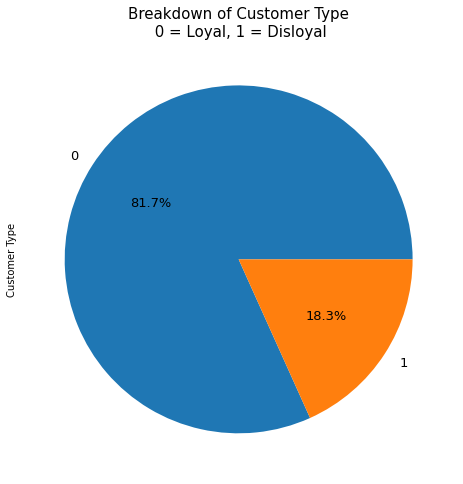

In [50]:
full_df.groupby(['Customer Type'])['Customer Type'].count(). \
        plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8,8), fontsize = 13)

plt.title('Breakdown of Customer Type\n 0 = Loyal, 1 = Disloyal', fontsize = 15)

- There is an unproportionate percentage of loyal customers compared to disloyal ones, the disloyal making up less than 20% of   the total data.
- Its important to take note of this discrepancy. 

### Take-away 2 - To see if most customer are satisfied or dissatisfied and seeing if them being loyal or disloyal affects that

Text(0.5, 1.0, 'Distribution of Satisfaction levels by Loyal/ Disloyal customers')

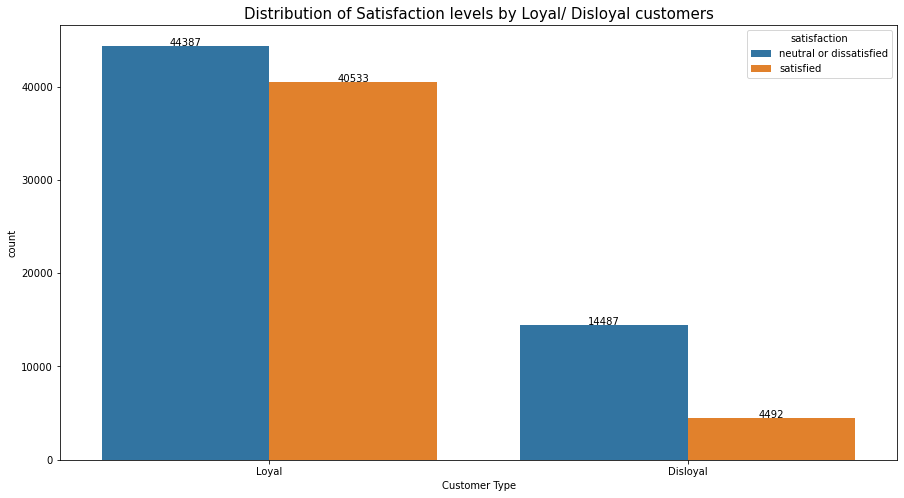

In [51]:
plt.figure(figsize = (15,8))
total = float(len(full_df))
ax = sns.countplot(x = 'Customer Type', hue = 'satisfaction', data = full_df)
ax.set_xticklabels(['Loyal', 'Disloyal'])
for l in ax.patches:
    x= l.get_x() + l.get_width() / 2
    y= l.get_height()
    ax.annotate(l.get_height(), (x, y), ha = 'center')
    
plt.title('Distribution of Satisfaction levels by Loyal/ Disloyal customers', fontsize = 15)

- There is clearly higher number of dissastified/ neutral customer as compared to satisfied customers.

Loyal being Satisfied: $\frac{40533}{84924}$ x 100% = 47.7%

Disloyal being Satisfied: $\frac{7355}{18980}$ x 100% = 23.7% 

- This shows that the majority of both loyal and disloyal customers are neutral/dissatisfied with the overall service.

### Take-away 3 - To check if the survey score total has correlation if customers will be satisfied or not

Text(0.5, 1.0, 'Comparing satisfaction to Avg Survey Total')

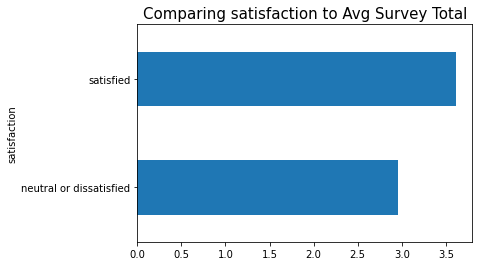

In [52]:
full_df.groupby(['satisfaction'])['Survey Average'].mean().plot(kind = 'barh')

plt.title('Comparing satisfaction to Avg Survey Total', fontsize = 15)

This shows that customers being satisfied has a higher average Survey Total. And that Airline X should aim for an average total score of above 3.5 to ensure a higher chance of customers being satisfied with the overall result.

### Take-away 4 - To see which attributes has the highest and lowest average score 

<AxesSubplot:>

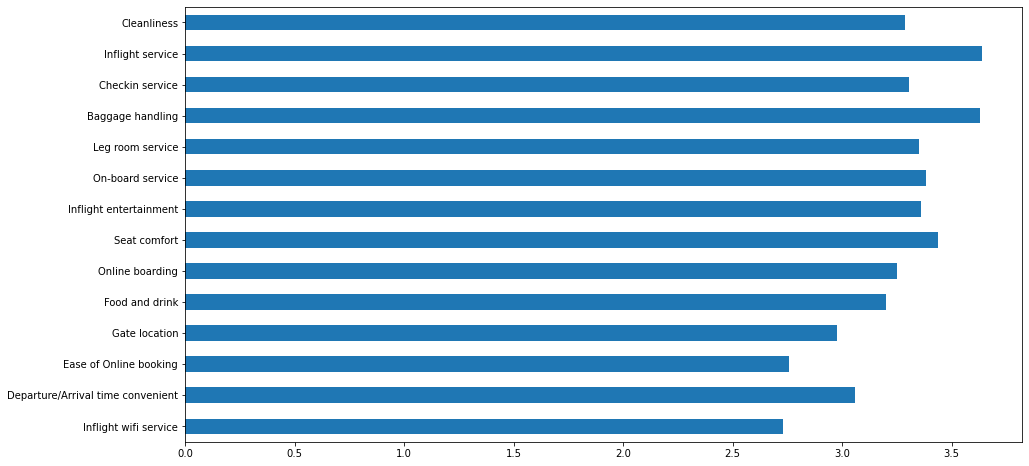

In [53]:
#To isolate the columns that contributes to the total scores and calculate the mean of each
survey_score = full_df[full_df.columns[8:22]].mean()
#To plot a bar graph to compare each attributes
survey_score.plot.barh(figsize = (15, 8), rot = 0)

- From this graph you can see that Airline X excels in Inflight service and Baggage Handling, as that attribute has the highest score compared to the   other attributes with an average score of higher than 3.5
- This graph also shows that the three lowest performing attributes is Inflight wifi service, Ease of Online booking and Gate     location, with average values lower than 3

### Take-away 5 - Comparing the age-groups of customers

I would want to find out if customers being in a certain age group will contribute to the satisfaction level of their experience taking Airline X

Text(0.5, 1.0, 'Breakdown of Customer Age Group')

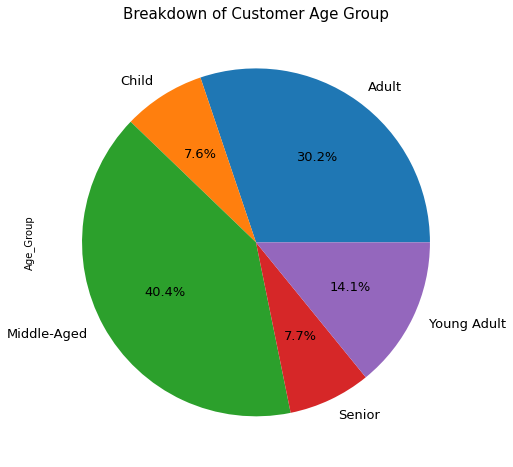

In [54]:
full_df.groupby(['Age_Group'])['Age_Group'].count(). \
        plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8,8), fontsize = 13)

plt.title('Breakdown of Customer Age Group', fontsize = 15)

As you can see from the pie chart, majority of Airline X customers are aged between 26 and 60. Making up more than 70% of the total customer age group. With the middle aged customer making up majority of the age group with 40.4%.

It is important to take note that majority of the customers are middle aged. 

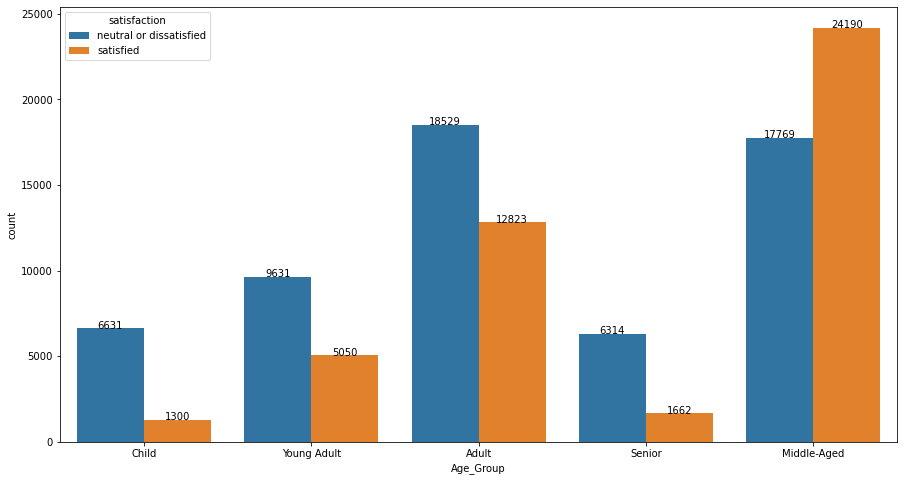

In [55]:
plt.figure(figsize = (15,8))
total = float(len(full_df))
ax = sns.countplot(x = 'Age_Group', hue = 'satisfaction', data = full_df)

for l in ax.patches:
    x = l.get_x() + l.get_width() / 2
    y = l.get_height()
    ax.annotate(l.get_height(), (x,y), ha = 'center')

From the bar chart you can see that most of the age groups are neutral or dissatisfied with the overall service, except for middle aged customers where majority of them are satisfied with the overall service. 

Knowing that middle aged make up the majority of the customer and them mostly being satisfied with the overall service, we can safely assume that most of the service provided is catered to the middle aged customers, on purpose or naturally.

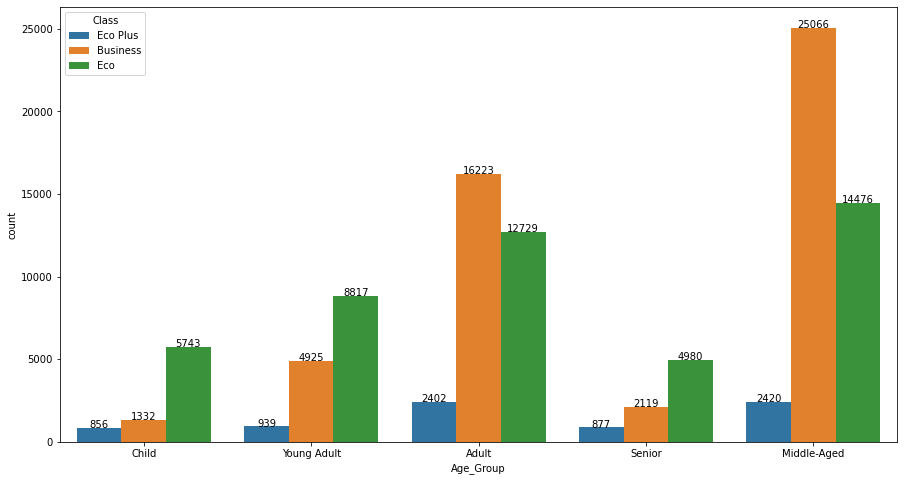

In [56]:
plt.figure(figsize = (15,8))
total = float(len(full_df))
ax = sns.countplot(x = 'Age_Group', hue = 'Class', data = full_df)
for l in ax.patches:
    x = l.get_x() + l.get_width() / 2
    y = l.get_height()
    ax.annotate(l.get_height(), (x,y), ha = 'center')

To futher understand why middle aged customer mostly are satisfied with the overall service I then looked at what Airline Class the age group usually takes. Showing that middle aged customers overwhelmingly prefer to pick the Business Class Tickets, it is safe to assume that the service provided in the Business Class are better than the other two classes.

However we can see that Age Group Adult also tend to prefer taking Business but they are mostly neutral or dissatisfied with the overall service.

## <font color= grey> Correlation Analysis

Provide the description, justification and results of your technique(s) here.

<AxesSubplot:>

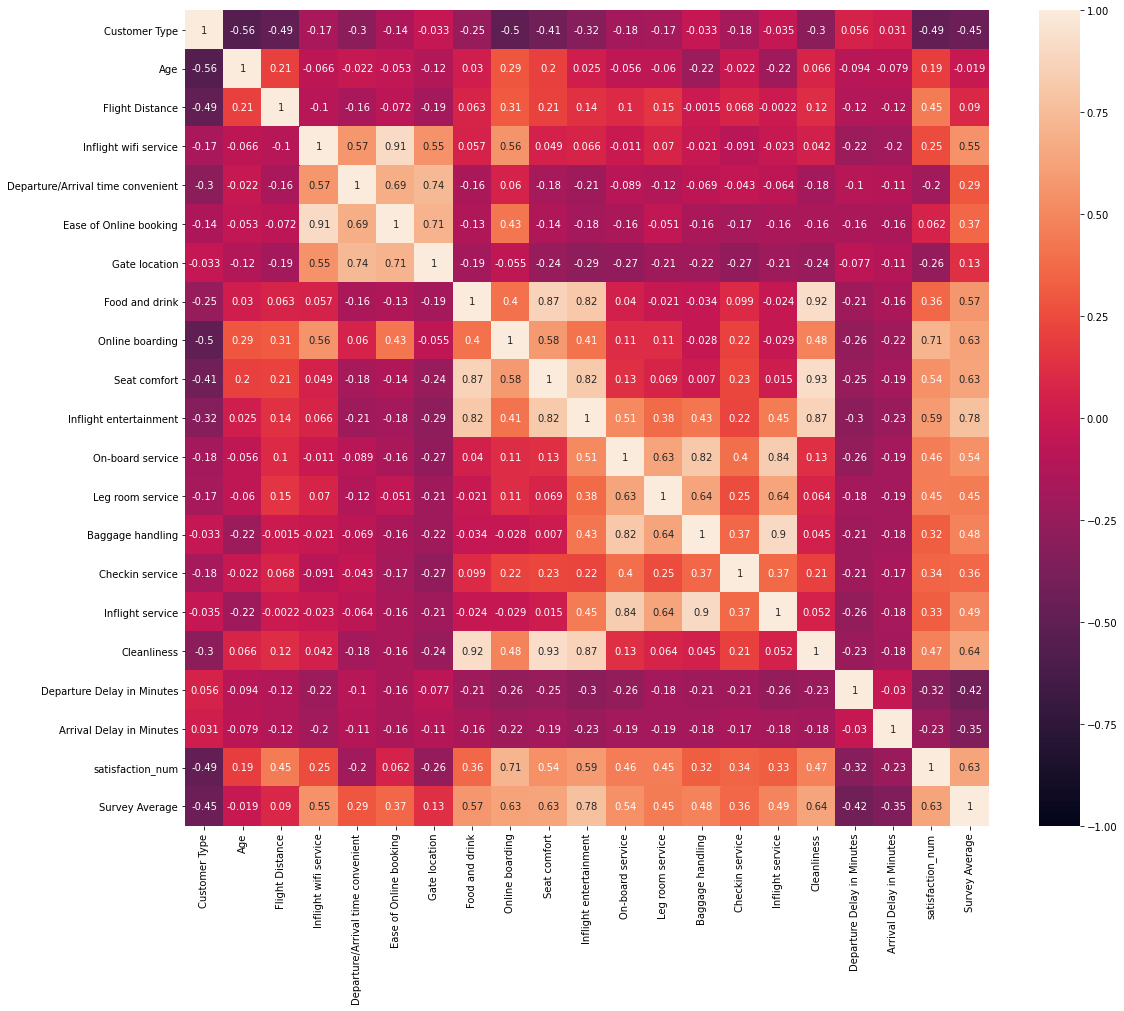

In [57]:
#Drop columns that will not contribute to analysise the Correlation Analysis or redundant ones.
corr_df = full_df.drop(['sn', 'id', 'Survey Total'], axis = 1).corr()
plt.figure(figsize = (18, 15))
sns.heatmap(corr_df.corr(), vmin = -1, vmax = 1, annot = True)

### I would be comparing the Survey Average to the different survey results to see if there is any correlations between Survey Average and each individual survey attributes.

- The highest correlation being Survey Average and Inflight Entertainment being 0.76 showing that it is very positively correlated. Suggesting that the higher a customer rates their Inflight Entertainment, more likely that customer would say that they are satisfied with the overall service.
- The other correlation being in the 0.59 - 0.69 shows that these attributes also play a pivitol role in determining wether a customer will be satisfied or not. 
    - Inflight wifi service, Food & Drink, Online Boarding, Seat Comfort and Cleanliness all fall into this category. 

### I would then would want to compare each attribute with each other to see if there is any correlations between them.

- The highest correlation between two single attributes will be between Seat Comfort and Cleanliness. Suggestig that customers who rate highly on one would most probably rate the other highly too. With a correlation score of 0.93, it is important to have both of these attributes to be looked at together.
- The same can be said about Food & Drinks and Cleanliness with a correlation score of 0.92

###### It is also important to take note that Cleanliness contribute to alot of the satifaction level of customer as there is 3 attributes with a correlation score more than 0.9 or high 0.8. This is imporant for Airline X as it shows them that focusing on Cleanliness is important.
###### The second attribute that Airline X should focus on would be Food & Drink as it contributed to 3 correlation score higher than 0.8.

# <font color= maroon> Data Modelling

## <font color= grey> Linear Regression

Provide the description, justification and results of your technique(s) here.

In [58]:
full_df_satisfied = full_df.loc[full_df['satisfaction_num'] == 1].drop(columns = ['satisfaction_num'])
corr_mat_sub = full_df_satisfied.drop(columns = ['id', 'sn']).corr()

In [59]:
cor_target = abs(corr_mat_sub["Survey Average"])

relevant_figures = cor_target[cor_target>0.2]
relevant_figures

Inflight wifi service                0.604525
Departure/Arrival time convenient    0.558151
Ease of Online booking               0.614868
Gate location                        0.531379
Food and drink                       0.331440
Online boarding                      0.433764
Seat comfort                         0.409163
Inflight entertainment               0.592633
On-board service                     0.438072
Leg room service                     0.416276
Baggage handling                     0.439981
Checkin service                      0.251981
Inflight service                     0.439051
Cleanliness                          0.389856
Survey Total                         0.997825
Survey Average                       1.000000
Name: Survey Average, dtype: float64

In [60]:
y = full_df["Survey Average"]
x = full_df[["Age", "Customer Type", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state = 123456789)

In [61]:
full_df['Age'] = full_df['Age'].apply(np.int64)

In [62]:
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
print('Intercept: \n', lin_regr.intercept_)
print('Coefficients: \n', lin_regr.coef_)

Intercept: 
 3.075509950951765
Coefficients: 
 [ 2.31465935e-03 -1.56302303e-01  9.25928329e-05 -5.06536558e-04
 -9.20338914e-09]


From these values above, we can then calculate the predicted Survey Average using inputing our own values into the Linear Equation;

3.075 (intercept) + (2.314e-03 * AgeValue) - (1.563e-01 * CustomerTypeValue) + (9.259e-05 * FlightDistanceValue) - (5.063e-04 * DepatureDelayValue) -(9.203e-09 * ArrivalDelayValue)

In [63]:
y_pred = lin_regr.predict(x_val)
print('Mean squared error (test): %0.2f' % mean_squared_error(y_val, y_pred))
print('Coefficient of determination: %0.2f' % r2_score(y_val, y_pred))

Mean squared error (test): 0.42
Coefficient of determination: 0.04


- The mean squared error score is desirable but that is judging from the score ranging from 0 - 5 which brings less meaning to having a lower mean squared error
- Knowing that an ideal Coefficient of determination is 1.0, the result from the Linear Regression is far from it and being completely unsatisfactory.
- This means thats the current dataset will be way too difficult to predict.
- More relevant data should be collected before being able to produce a reasonable prediction model.

In [64]:
x_train = sm.add_constant(x_train)
lin_regr2 = sm.OLS(y_train, x_train).fit()
lin_regr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Survey Average   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     714.8
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:38:12   Log-Likelihood:                -81989.
No. Observations:               83123   AIC:                         1.640e+05
Df Residuals:                   83117   BIC:                         1.640e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.0755      0.007    411.822      0.000       3.061       3.090
Age                            0.0023      0.000     14.914      0.000       0.002       0.003
Customer Type                 -0.1563      0.006    -25.194      0.000      -0.168      -0.144
Flight Distance             9.259e-05   2.32e-06     39.924      0.000     8.8e-05    9.71e-05
Departure Delay in Minutes    -0.0005   5.84e-05     -8.679      0.000      -0.001      -0.000
Arrival Delay in Minutes   -9.203e-09   5.41e-08     -0.170      0.865   -1.15e-07    9.68e-08
==============================================================================
Omnibus:                     1106.662   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              796.157
Skew:                          -0.136   Prob(JB):                    1.31e-173
Kurtosis:                       2.606   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion for Linear Regression:
 - Looking at the R2 value being 0.041, which is very low for a model and it being aligned with our findings earlier about the low coefficient of determination value.
 - However the p-values (P>|t| column) is all satisfactory other than Arrival Delay in Minutes.

## <font color= grey> Logistic Regression

Provide the description, justification and results of your technique(s) here.

In [65]:
cor_target = abs(corr_df['satisfaction_num'])

relevant_figures = cor_target[cor_target>0.1]
relevant_figures

Customer Type             0.187620
Age                       0.137131
Flight Distance           0.298688
Inflight wifi service     0.284305
Ease of Online booking    0.171680
Food and drink            0.209922
Online boarding           0.503552
Seat comfort              0.349452
Inflight entertainment    0.398035
On-board service          0.322348
Leg room service          0.313093
Baggage handling          0.247472
Checkin service           0.236189
Inflight service          0.244690
Cleanliness               0.305200
satisfaction_num          1.000000
Survey Average            0.496447
Name: satisfaction_num, dtype: float64

In [66]:
y = full_df["satisfaction_num"]
x = full_df.drop(columns = ['Gender', 'satisfaction_num', 'id', 'sn', 'Type of Travel', 'Class', 'satisfaction', 'Age_Group', 'Gate location'])

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 7)
x_sm, y_sm = smote.fit_resample(x,y)

x_train, x_val, y_train, y_val = train_test_split(x_sm, y_sm, train_size = 0.8, random_state = 123456789)

y_val.value_counts()

0    11824
1    11728
Name: satisfaction_num, dtype: int64

As expected, the predictor with the highest value matches with the findings from the correlation heatmap;
- Online Boarding
- Inflight Entertainment
- Seat Comfort

However these values are not satisfactory. None of the attributes are particularly good in predicting wether the customer will leave satisfied or not. I will not be performing the feature selection as the correlation values are too low and it will result in a poor model that cannot accurately predict the satisfaction values of the customers.

In [67]:
satisfied_classifier = LogisticRegression(max_iter = 100000, random_state = 1)
satisfied_classifier.fit(x_train, y_train)
print('intercept: ', satisfied_classifier.intercept_)
print('coefficient: ', satisfied_classifier.coef_[0])

intercept:  [-7.89328596]
coefficient:  [-8.66347419e-01  2.50068837e-04  4.65052278e-04 -1.71961426e-01
 -9.21060174e-01 -6.66006996e-01 -5.49569146e-01  3.05025204e-01
 -4.13701552e-01 -2.22114528e-01 -2.17236663e-01 -1.69174959e-01
 -3.94689687e-01 -2.38241579e-01 -4.49613928e-01 -4.07540182e-01
  3.89643226e-03 -7.63009307e-03  4.53458872e-01  3.90494967e-01]


In [68]:
satisfied_classifier.feature_names_in_

array(['Customer Type', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Survey Total', 'Survey Average'],
      dtype=object)

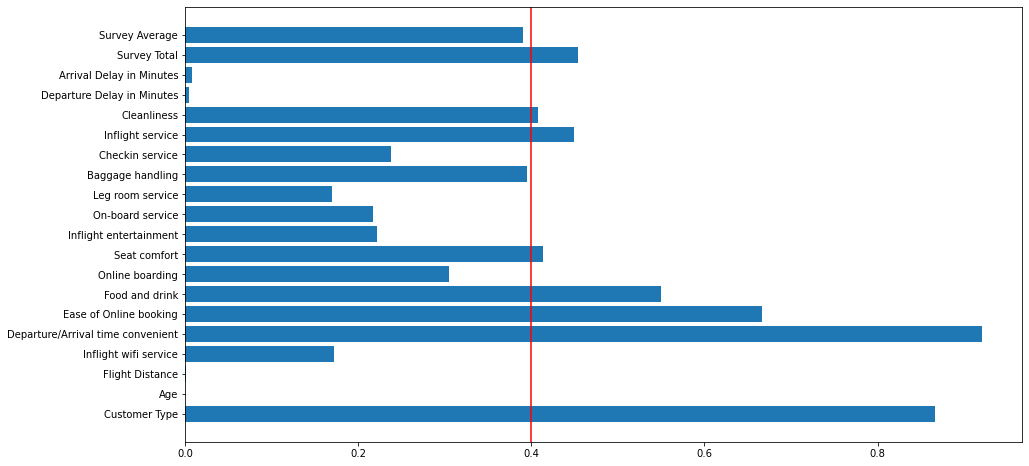

In [69]:
coeff = satisfied_classifier.coef_[0]
coeff = abs(coeff)
fig = plt.figure(figsize = (15,8))
plt.axvline(x=0.4, color = 'red')
plt.barh(satisfied_classifier.feature_names_in_, coeff)
plt.show()

From the graph we can see that values above 0.4 coefficient values are important factors in the Logistic Regression Model. The values with higher than 0.4 coefficient values are:
- Cleanliness 
- Inflight Service
- Seat Comfort
- Food & Drink
- Departure/ Arrival time Convenient
- Ease of Online booking
- Customer Type

In [70]:
log_predict = satisfied_classifier.predict(x_val)
log_conf_matrix = confusion_matrix(y_val, log_predict)
log_acc_score = accuracy_score(y_val, log_predict)

log_predict_train = satisfied_classifier.predict(x_train)
log_predict_acc_score_train = accuracy_score(y_train, log_predict_train)

print('\n')
print('Confusion Matrix')
print(log_conf_matrix)
print('\n')
print(classification_report(y_val, log_predict))
print('Accuracy of Logistic Regression - Test: {:.3f}'.format(log_acc_score*100), '% \n')
print('Accuracy of Logistic Regression - Train: {:.3f}'.format(log_predict_acc_score_train*100), '%')



Confusion Matrix
[[9885 1939]
 [2126 9602]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83     11824
           1       0.83      0.82      0.83     11728

    accuracy                           0.83     23552
   macro avg       0.83      0.83      0.83     23552
weighted avg       0.83      0.83      0.83     23552

Accuracy of Logistic Regression - Test: 82.740 % 

Accuracy of Logistic Regression - Train: 82.849 %


Takeaway:
Judging from the Accuracy of the Logistic Regression Test results and Train results its fairly accurate having the accuracy score being 82.7% and 82.8% respectively.

And judging that both Accuracy results are almost the same it means that the model accurately predicted meaning no overfitting or underfitting is present.

Hence Logistic Regression is a good model to consider for this dataset.

## <font color= grey> k-means clustering

For K-Means clustering I would not be including any categorical columns, due to the raandom nature of k-means generates centroids.

In [71]:
full_df_num = full_df.drop(columns = ['Gender', 'satisfaction_num', 'id', 'sn', 'Type of Travel', 'Class', 'satisfaction', 'Age_Group', 'Gate location'])
full_df_num

,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Survey Total,Survey Average
0,0,13,460,3,4.0,3.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,54.0,3.857143
1,1,25,235,3,2.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,32.0,2.285714
2,0,26,1142,2,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,52.0,3.714286
3,0,25,562,2,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,42.0,3.000000
4,0,61,214,3,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,49.0,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,1,23,192,2,1.0,2.0,2,2,2,2,3,1,4,2,3,2,3.0,0.0,31.0,2.214286
103901,0,49,2347,4,4.0,4.0,2,4,5,5,5,5,5,5,5,4,0.0,0.0,61.0,4.357143
103902,1,30,1995,1,1.0,1.0,4,1,5,4,3,2,4,5,5,4,7.0,14.0,43.0,3.071429
103903,1,22,1000,1,1.0,1.0,1,1,1,1,4,5,1,5,4,1,0.0,0.0,32.0,2.285714


In [72]:
scaler = StandardScaler()

scaled_cc_data = scaler.fit_transform(full_df_num)
scaled_cc_data = pd.DataFrame(scaled_cc_data)
scaled_cc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.472751,-1.745327,-0.731517,0.203511,0.616170,0.173716,1.352238,-0.185526,1.183114,1.231718,0.479416,-0.266859,0.311934,0.549818,1.156458,1.305902,0.266401,-0.003025,0.938088,0.929967
1,2.115276,-0.951373,-0.957162,0.203511,-0.695149,0.173716,-1.656326,-0.185526,-1.849318,-1.769100,-1.849176,1.253385,-0.534687,-1.821012,0.305866,-1.742300,-0.361372,-0.003348,-1.435858,-1.442290
2,-0.472751,-0.885211,-0.047560,-0.549619,-0.695149,-0.541099,1.352238,1.296512,1.183114,1.231718,0.479416,-0.266859,0.311934,0.549818,0.305866,1.305902,-0.387529,-0.003509,0.722275,0.714307
3,-0.472751,-0.951373,-0.629224,-0.549619,1.271830,1.603346,-0.904185,-0.926544,-1.091210,-1.018896,-1.072979,1.253385,-0.534687,-1.821012,0.305866,-0.980250,-0.099800,-0.003267,-0.356792,-0.363992
4,-0.472751,1.430487,-0.978223,0.203511,-0.039490,0.173716,0.600097,1.296512,1.183114,-0.268691,-0.296781,0.493263,0.311934,-0.240459,-0.544726,-0.218199,-0.387529,-0.003509,0.398555,0.390817


In [73]:
inertias = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 10000, random_state = 1)
    kmeanModel.fit(scaled_cc_data)
    
    inertias.append(kmeanModel.inertia_)

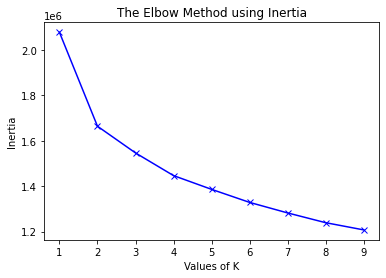

In [74]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From this graph we can see that at k = 4, The inertia seems gradually start to decrease. Hence I will be using 4 clusters for my dataset.

In [75]:
kmeanModel = KMeans(init = 'random', n_clusters = 4, n_init = 10, max_iter = 10000, random_state = 1)
kmeanModel.fit(scaled_cc_data)

print('The 3 cluster centroids are at: ', kmeanModel.cluster_centers_)
print()
print('The number of iterations required to converge: ', kmeanModel.n_iter_)
print()
print('Th lowest SSE from the runs: ', kmeanModel.inertia_)

The 3 cluster centroids are at:  [[ 0.46608505 -0.50038552 -0.33163731 -0.34980688 -0.10080123 -0.23194081
  -1.08669711 -0.782577   -1.20742362 -1.09421514 -0.16951895 -0.10918361
   0.0230067  -0.23590129  0.03326268 -1.17433502  0.07369884 -0.00302287
  -0.93653934 -0.93743203]
 [-0.20577003  0.14244166  0.21483205  0.95166734  0.60279001  0.84750628
   0.40495226  0.67214055  0.5065918   0.65130811  0.4899761   0.43801634
   0.45331277  0.32716401  0.4602661   0.49377449 -0.03730776 -0.00314683
   1.11740645  1.11841533]
 [ 0.03042221 -0.01546594  0.07174423 -0.6296855  -0.51558601 -0.71052133
   0.48389462 -0.08505659  0.48619935  0.69454214  0.40528572  0.24840816
   0.41680884  0.20610368  0.42757502  0.55408916 -0.03510474 -0.00313908
   0.18116638  0.18140553]
 [-0.254225    0.35680914 -0.01853222 -0.1577567  -0.09118198 -0.04986483
   0.04529075  0.0339058   0.0352608  -0.51846432 -0.94240742 -0.75439537
  -1.11020797 -0.42474939 -1.14277061 -0.06175038  0.01262955  0.0110109

In [76]:
cc_data_clustered = full_df_num.assign(Cluster = lambda x: kmeanModel.labels_)
cc_data_clustered

,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Survey Total,Survey Average,Cluster
0,0,13,460,3,4.0,3.0,5,3,5,5,4,3,4,4,5,5,25.0,18.0,54.0,3.857143,1
1,1,25,235,3,2.0,3.0,1,3,1,1,1,5,3,1,4,1,1.0,6.0,32.0,2.285714,0
2,0,26,1142,2,2.0,2.0,5,5,5,5,4,3,4,4,4,5,0.0,0.0,52.0,3.714286,2
3,0,25,562,2,5.0,5.0,2,2,2,2,2,5,3,1,4,2,11.0,9.0,42.0,3.000000,0
4,0,61,214,3,3.0,3.0,4,5,5,3,3,4,4,3,3,3,0.0,0.0,49.0,3.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,1,23,192,2,1.0,2.0,2,2,2,2,3,1,4,2,3,2,3.0,0.0,31.0,2.214286,0
103901,0,49,2347,4,4.0,4.0,2,4,5,5,5,5,5,5,5,4,0.0,0.0,61.0,4.357143,1
103902,1,30,1995,1,1.0,1.0,4,1,5,4,3,2,4,5,5,4,7.0,14.0,43.0,3.071429,2
103903,1,22,1000,1,1.0,1.0,1,1,1,1,4,5,1,5,4,1,0.0,0.0,32.0,2.285714,0


In [77]:
cc_data_clustered.groupby(['Cluster']).mean()

,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Survey Total,Survey Average
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.362807,31.807601,858.456745,2.264844,2.907182,2.432098,1.757686,2.193892,1.846811,1.899714,3.164516,3.207792,3.659641,3.006514,3.680304,1.745488,17.623418,18.080951,36.631302,2.620414
1,0.103129,41.537093,1403.660979,3.992905,3.979539,3.942413,3.740248,4.157184,4.107320,4.226058,4.013233,3.926969,4.166821,3.718269,4.181143,3.933998,13.384562,13.472774,55.658339,3.981725
2,0.194514,39.142134,1260.583205,1.894638,2.272935,1.763536,3.846535,3.136318,4.081498,4.284154,3.903381,3.677123,4.122810,3.563994,4.141608,4.014146,13.470639,13.761773,46.983678,3.361167
3,0.084333,44.780569,1171.410416,2.519168,2.920788,2.686302,3.260525,3.295142,3.484464,2.665470,2.167790,2.358206,2.319125,2.766389,2.296674,3.203764,15.319519,540.990328,38.772560,2.773635


I will be showing the results of the Kmeans in the series of graphs below, showing that the clustering was not performed ideally.

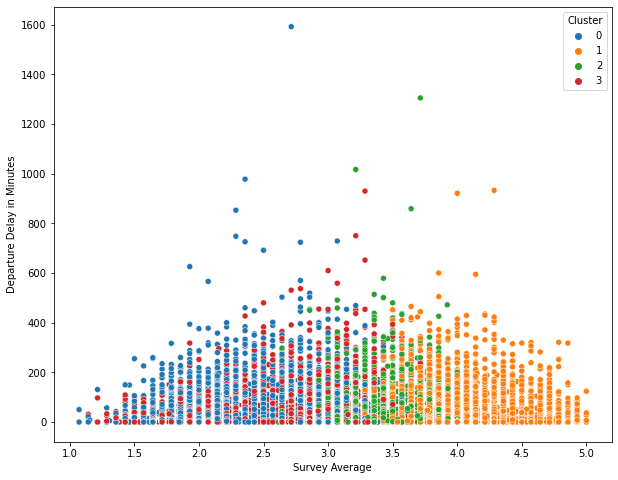

In [78]:
from matplotlib import rcParams


plt.figure(figsize = (10,8))
sns.scatterplot(data = cc_data_clustered, x = 'Survey Average', y = 'Departure Delay in Minutes', hue = 'Cluster', palette = 'tab10')
pd.set_option("display.max_rows", None ,"display.max_columns", None)

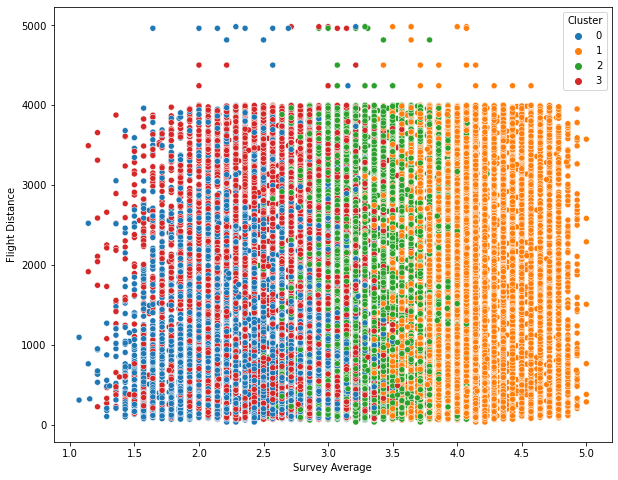

In [79]:
from matplotlib import rcParams


plt.figure(figsize = (10,8))
sns.scatterplot(data = cc_data_clustered, x = 'Survey Average', y = 'Flight Distance', hue = 'Cluster', palette = 'tab10')
pd.set_option("display.max_rows", None ,"display.max_columns", None)

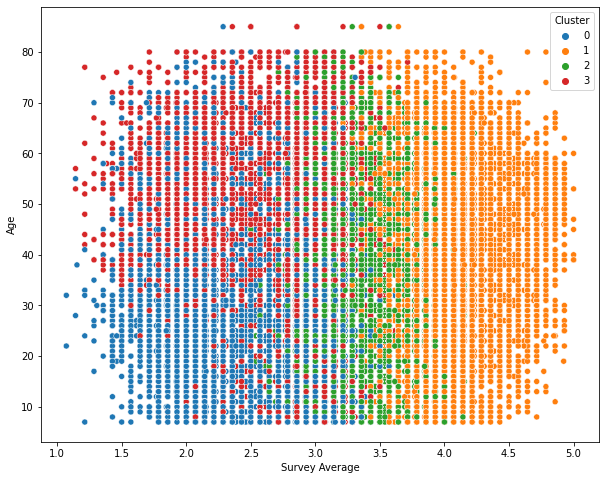

In [80]:
from matplotlib import rcParams


plt.figure(figsize = (10,8))
sns.scatterplot(data = cc_data_clustered, x = 'Survey Average', y = 'Age', hue = 'Cluster', palette = 'tab10')
pd.set_option("display.max_rows", None ,"display.max_columns", None)

TakeAway:
This dataset lacks the numerical values to perform a good K-Means clustering as all the graphs produced shows overlapping of clustering.

But if I were to make the best of the visual representation of the clustering I would assume: 
- Cluster 0 : Younger customer who has low to mid survey average.
- Cluster 1 : All customers who scored Airline X highly 
- Cluster 2 : All customers who scored Airline X with an average score of 3-4
- Cluster 3 : Older customers who has low to mid survey average

# <font color= maroon> Recommendations & Conclusion

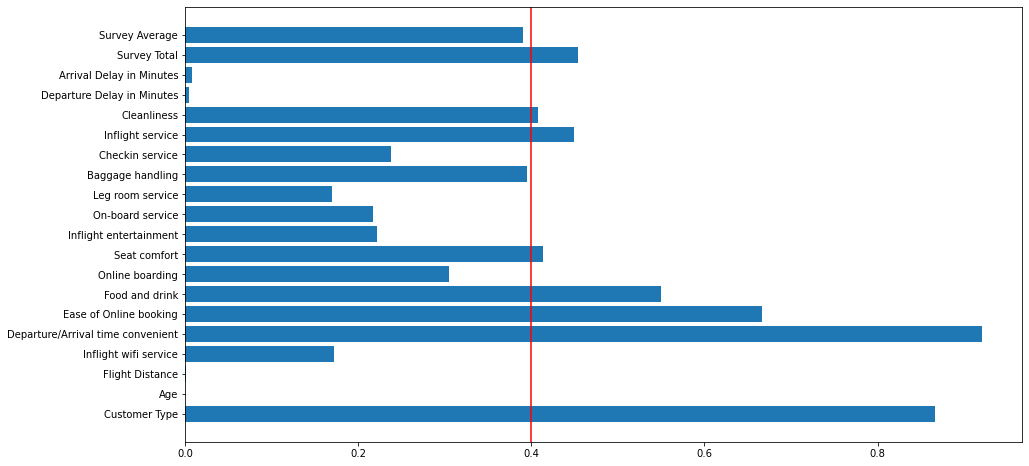

In [81]:
coeff = satisfied_classifier.coef_[0]
coeff = abs(coeff)
fig = plt.figure(figsize = (15,8))
plt.axvline(x=0.4, color = 'red')
plt.barh(satisfied_classifier.feature_names_in_, coeff)
plt.show()

Judging from the Logistic Regression Model Airline X should focus more on attributes that contributes more to the satisfaction of the customers:
- Cleanliness 
- Inflight Service
- Seat Comfort
- Food & Drink
- Departure/ Arrival time Convenient
- Ease of Online booking
- Customer Type

And knowing that the Accuracy of the Logistic Regression Model was satisfactory, it is safe to come up with this conclusion.

<AxesSubplot:>

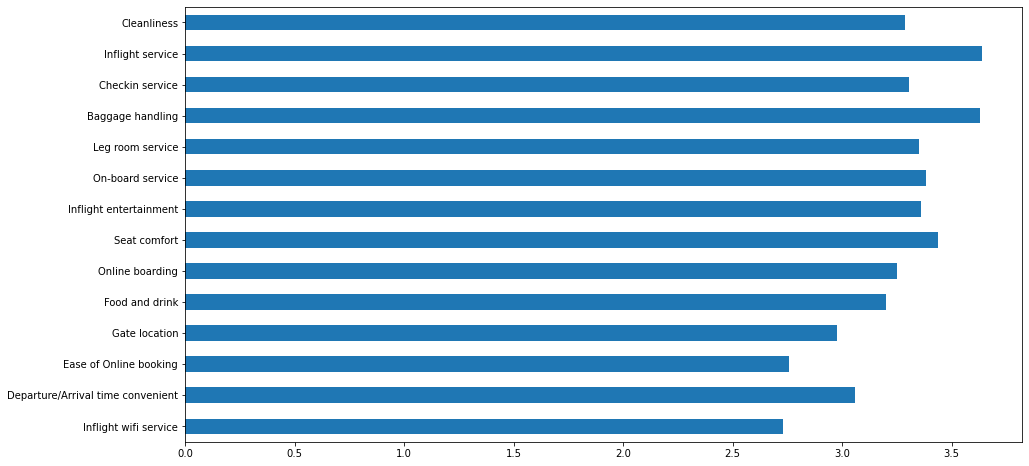

In [82]:
#To isolate the columns that contributes to the total scores and calculate the mean of each
survey_score = full_df[full_df.columns[8:22]].mean()
#To plot a bar graph to compare each attributes
survey_score.plot.barh(figsize = (15, 8), rot = 0)

Airline X would also want to work on areas that are not scoring well amongst all customers:
- Ease of Online Booking with an average score of lower than 3.0
- Inflight Wifi service with an average score of lower than 3.0

However for the other prediction models, Kmeans and Linear Regression, the dataset would need more meaningful numerical values to make sensible use of said prediction model. 

The result of these prediction models using the dataset is not at all satisfactory and cannot be made useful from the results, with reference to the takeaways said in each prediction model.

# <font color= maroon> References